# AI for Medical Diagnosis — Data Exploration and Image Pre-Processing

## Data Exploration

Work with chest x-ray images taken from the public [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315).

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

### Dataset

- Patient ID
- Image URL
- Conditions (one-hot-encoding: Atelectasis, Cardiomegaly, Consolidation, Edema, etc)

In [97]:
train_df = pd.read_csv('/kaggle/input/chest-x-ray/train-small.csv')
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image. 

### Data types and null values check
Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Unique IDs check
"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [99]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease. 

In [100]:
columns = list(train_df.keys())
columns

['Image',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'PatientId',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [101]:
columns.remove('Image')
columns.remove('PatientId')

print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Run the next cell to print out the number of positive labels (1's) for each condition

In [102]:
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe. 

Run the cell below to visualize a random selection of images from the dataset.

Display Random Images


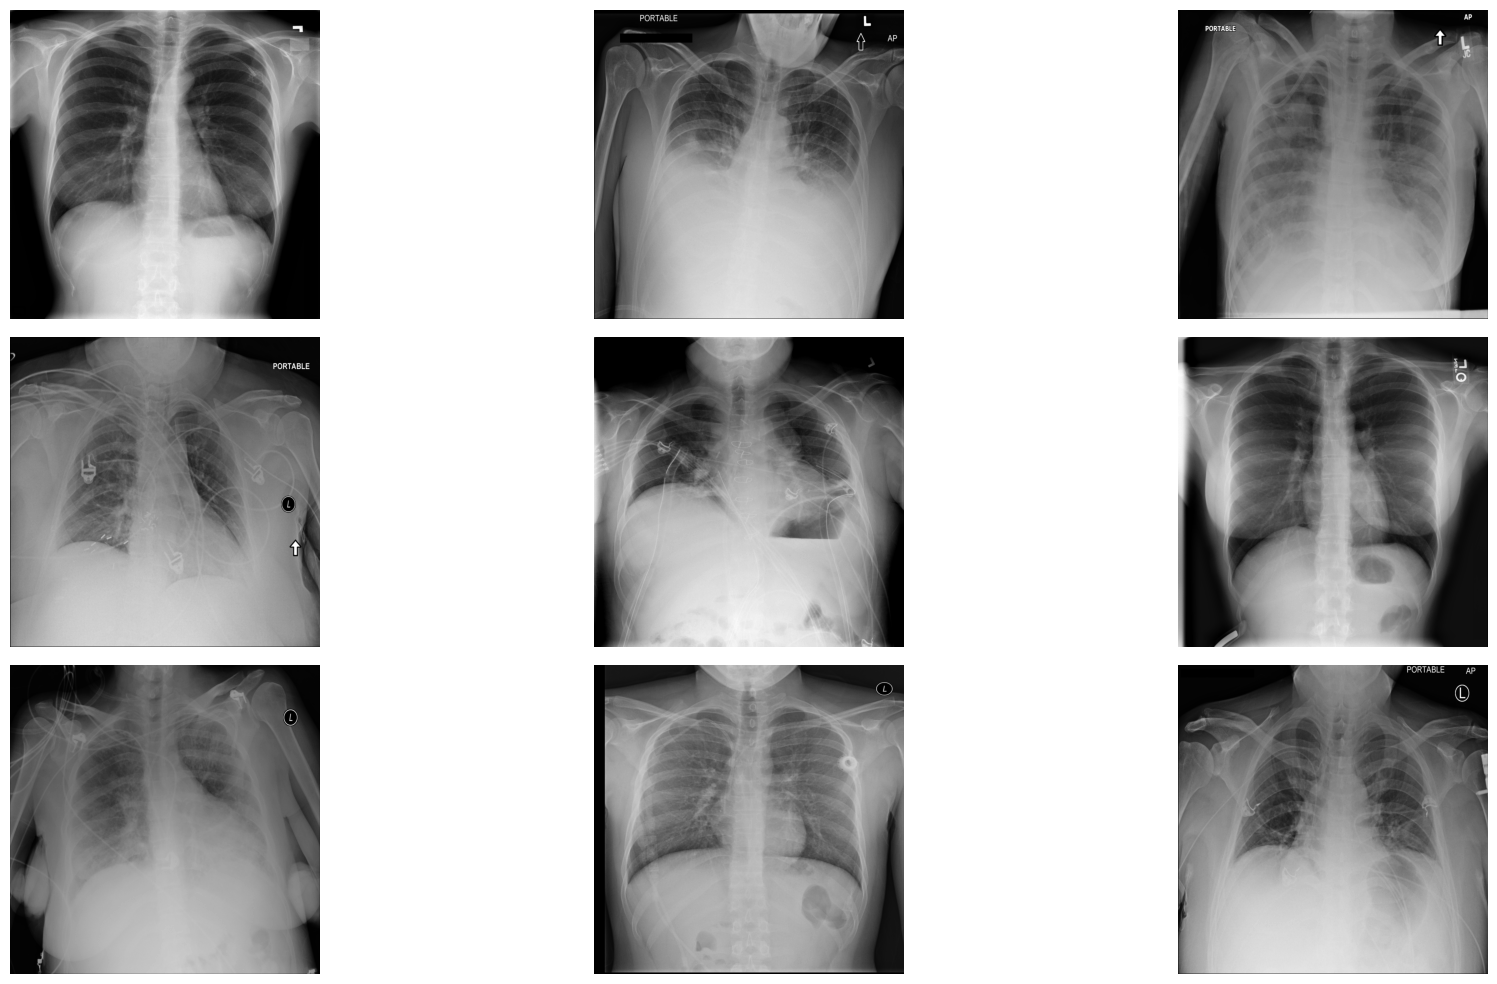

In [103]:
images = train_df['Image'].values
random_images = [np.random.choice(images) for i in range(9)]

img_dir = '/kaggle/input/images/images-small/'

print('Display Random Images')

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()    

### Investigate a single image
Run the cell below to look at the first image in the dataset and print out some details of the image contents.

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


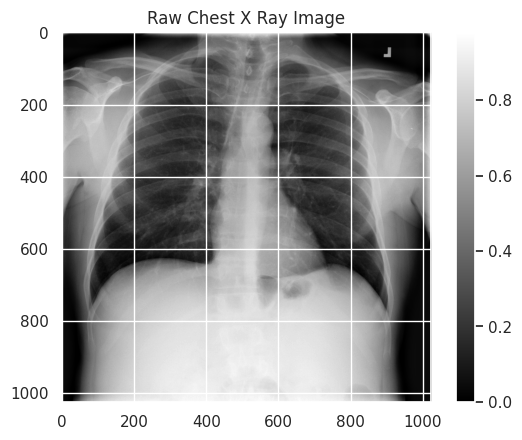

In [104]:
sample_img = train_df.Image[0]
image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {image.shape[0]} pixels width and {image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {image.max():.4f} and the minimum is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f} and the standard deviation is {image.std():.4f}")

### Investigate pixel value distribution

Run the cell below to plot up the distribution of pixel values in the image shown above. 

- A higher mean value generally indicates a brighter image.
- A lower mean value generally indicates a darker image.
- A higher standard deviation indicates a wider range of pixel values, suggesting higher contrast in the image (more distinct light and dark areas).
- A lower standard deviation indicates a narrower range of pixel values, suggesting lower contrast (more uniform brightness).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-11.430555555555548, 0.5, '# Pixels in Image')

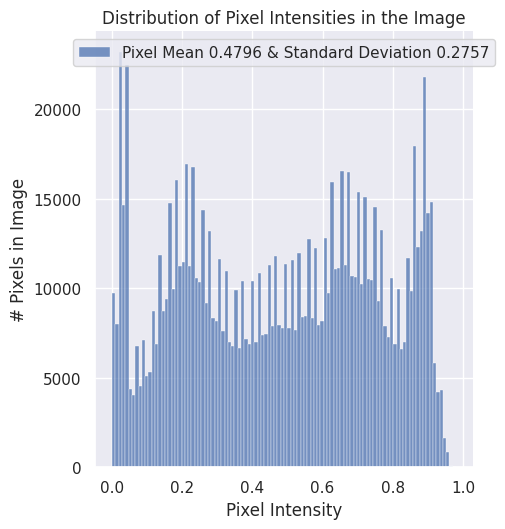

In [105]:
sns.displot(image.ravel(), 
            label=f'Pixel Mean {np.mean(image):.4f} & Standard Deviation {np.std(image):.4f}',
            kde=False)

plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Image Preprocessing

In [106]:
import torch

from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image

### Standardization

The `Normalization` adjusts the image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the normalization will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation. It rescales features to a common range, which prevents certain features from dominating others simply because of their larger magnitude

$$\frac{x_i - \mu}{\sigma}$$

In [107]:
class Normalization(object):
    def __call__(self, tensor):
        # dim: (C, H, W) -> get mean for height H (1) and width W (2)
        dim = [1, 2]
        mean = tensor.mean(dim=dim, keepdim=True)
        std = tensor.std(dim=dim, keepdim=True)
        std = torch.clamp(std, min=1e-5)

        # z-score: standardization
        return (tensor - mean) / std

Example using normalization for an image

In [108]:
img_name = train_df.iloc[0]['Image']
img_path = os.path.join(img_dir, img_name)
rgb_image = Image.open(img_path).convert('RGB')
image_tensor = transforms.ToTensor()(transforms.Resize((320, 320))(rgb_image))
print('Before normalization: ', torch.min(image_tensor).item(), torch.max(image_tensor).item())

normalized = Normalization()(image_tensor)
print('With normalization: ', torch.min(normalized).item(), torch.max(normalized).item())

Before normalization:  0.0 0.9647058844566345
With normalization:  -1.742884874343872 1.762802243232727


In [109]:
transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    Normalization()
])

In [110]:
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform, img_dir):
        self.dataframe = dataframe
        self.transform = transform
        self.img_dir = img_dir

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['Image']
        label = self.dataframe.iloc[idx]['Mass']
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [111]:
dataset = CustomImageDataset(
    dataframe=train_df,
    transform=transform,
    img_dir=img_dir
)

dataset

In [112]:
dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False
)

dataloader

In [113]:
data_iter = iter(dataloader)
batch = next(data_iter)
images, labels = batch
images.shape, labels.shape

(torch.Size([1, 3, 320, 320]), torch.Size([1]))

torch.Size([3, 320, 320])
The dimensions of the transformed_image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7628 and the minimum is -1.7429
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


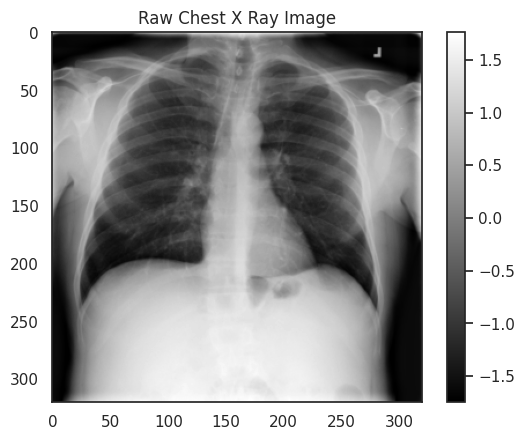

In [123]:
transformed_image = images[0]

sns.set_style("white")
plt.imshow(transformed_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(transformed_image.shape)
print(f"The dimensions of the transformed_image are {transformed_image.shape[1]} pixels width and {transformed_image.shape[2]} pixels height")
print(f"The maximum pixel value is {transformed_image.max():.4f} and the minimum is {transformed_image.min():.4f}")
print(f"The mean value of the pixels is {transformed_image.mean():.4f} and the standard deviation is {transformed_image.std():.4f}")

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image. 

tensor([ 1.0645,  0.8935,  0.7225,  ..., -1.4864, -1.3866, -1.3154])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '# Pixel')

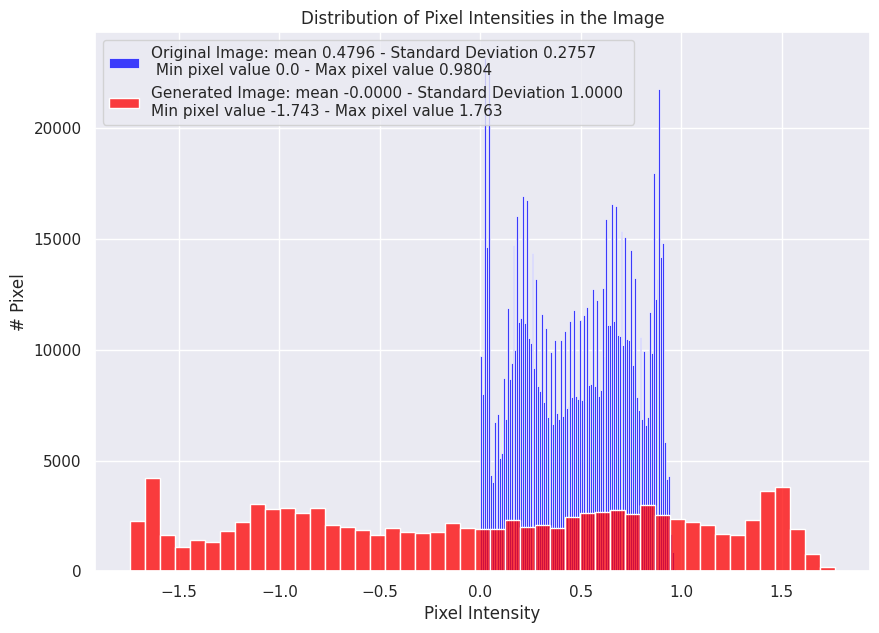

In [138]:
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for the original image
sns.histplot(image.ravel(), 
             label=f'Original Image: mean {np.mean(image):.4f} - Standard Deviation {np.std(image):.4f} \n '
             f'Min pixel value {np.min(image):.4} - Max pixel value {np.max(image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for the transformed image
sns.histplot(transformed_image[0].ravel(), 
             label=f'Generated Image: mean {transformed_image[0].mean():.4f} - Standard Deviation {transformed_image[0].std():.4f} \n'
             f'Min pixel value {transformed_image[0].min():.4} - Max pixel value {transformed_image[0].max():.4}', 
             color='red', 
             kde=False)

plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')